In [118]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

## Read + Clean Data

In [119]:
raw = pd.read_csv('../dat/inf-USAir97.mtx', sep=' ', skiprows=23, header=None, names=['node1','node2','weight'])

In [120]:
raw.head()

,node1,node2,weight
0,332,332,2126.0000
1,2,1,0.0436
2,4,1,0.0767
3,8,1,0.1026
4,4,2,0.0515


In [121]:
raw[raw['node1'] == raw['node2']]

,node1,node2,weight
0,332,332,2126.0


In [122]:
raw.drop([0], inplace=True)

## Build Graph

Let's build this data into a graph, but because of the limited display power here, I'll only keep a few of the data.

In [126]:
edge_num = raw.shape[0]
raw.drop(range(51, edge_num + 1), inplace=True)
node_list = list(set(list(raw['node1']) + list(raw['node2'])))
edge_num = raw.shape[0]

In [127]:
graph = nx.Graph()

In [128]:
for i in node_list:
    graph.add_node(i, name=i)
    
for i in range(edge_num):
    graph.add_edge(raw['node1'].iloc[i], raw['node2'].iloc[i], weight=raw['weight'].iloc[i])

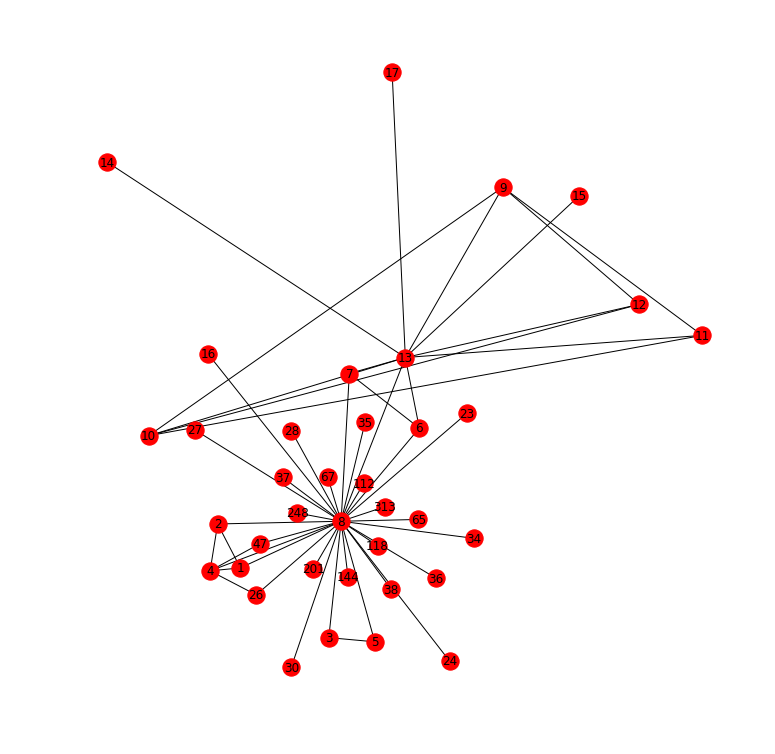

In [131]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(graph)
nx.draw(graph, pos)
node_labels = nx.get_node_attributes(graph, 'name')
nx.draw_networkx_labels(graph, pos, labels = node_labels)
#edge_labels = nx.get_edge_attributes(graph, 'weight')
#nx.draw_networkx_edge_labels(graph, pos, labels = edge_labels)
plt.show()